逻辑回归不是一个回归的算法，是一个用来进行分类的算法  基于多元线性回归

sigmoid:二分类

回归：拟合方程，用来预测趋势

分类：进行分类

逻辑回归中对应一条非常重要的曲线S型曲线，对应的函数是Sigmoid函数

sigmoid的范围是0-1

In [2]:
import matplotlib.pyplot as plt
import numpy as np
# linear_model:线性模块  LogisticRegression:回归模块，用于分类
from sklearn.linear_model import LogisticRegression

公式： $f(x) = \frac{1}{1 + e^{-x}}$

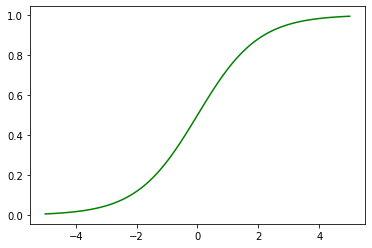

In [3]:
# 自定义一个sigmoid函数
def sigmoid(X):
    return 1 / (1 + np.exp(-X))
# 定义X
X = np.linspace(-5, 5, 100)
# 求出对应的y
y = sigmoid(X)
# 画出sigmoid函数的图形
plt.plot(X, y, color='g')

### 逻辑回归公式

$l(\theta) = \ln{L(\theta)} = \sum\limits_{i = 1}^n(y^{(i)}\ln(h_{\theta}(x^{(i)})) + (1-y^{(i)})\ln(1-h_{\theta}(x^{(i)})))$

sigmoid函数

$h_{\theta}(x) = g(\theta^Tx) = \frac{1}{1 + e^{-\theta^Tx}}$

$g(\theta^Tx)$为多元线性方程的公式,因为sigmoid基于多元线性回归

### 逻辑回归损失函数

$J(\theta) = -l(\theta) = -\sum\limits_{i = 1}^n[y^{(i)}\ln(h_{\theta}(x^{(i)})) + (1-y^{(i)})\ln(1-h_{\theta}(x^{(i)}))]$

### 损失函数立体化呈现

In [4]:
from sklearn import datasets
# 导入3D模型
from mpl_toolkits.mplot3d import Axes3D
# 导入归一化  scale:Z-score归一化方式
from sklearn.preprocessing import scale

In [5]:
# 加载数据
X, y = datasets.load_breast_cancer(return_X_y=True)  # 乳腺癌数据
display(X.shape, y.shape)
# 切片前面两个特征
X = X[:,:2]
# 对数据进行归一化
X = scale(X)

(569, 30)

(569,)

In [6]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [7]:
w1 = model.coef_[0, 0]
w2 = model.coef_[0, 1]
display(w1, w2)

-3.3373102846154525

-0.8771414036339873

In [8]:
b = model.intercept_
b

array([0.69962639])

#### 定义sigmoid函数

In [9]:
def sigmoid(X, w1, w2, b):
    z = w1*X[0] + w2*X[1] + b  # 多元线性回归方程
    return 1 / (1 + np.exp(-z))  # sigmoid函数的公式

#### 定义sigmoid的损失函数  $g\theta$
<font size = 5 color = 'green'>$J(\theta) = -l(\theta) = -\sum\limits_{i = 1}^n[y^{(i)}\ln(h_{\theta}(x^{(i)})) + (1-y^{(i)})\ln(1-h_{\theta}(x^{(i)}))]$</font>

$h_{\theta}(x)$为simoid

In [10]:
def loss_function(X, y, w1, w2, b):
    loss = 0
    for x_i, y_i in zip(X, y):
        p = sigmoid(x_i, w1, w2, b) # 概率
#         p = np.clip(p, 0.0000001, 0.99999999)  # 对概率进行裁剪，防止分母为0 
        loss += -y_i*np.log(p)+(1-y_i)*np.log((1-p))
    return loss

#### 参数w1和w2的取值空间

In [11]:
w1_space = np.linspace(w1 - 4, w1 + 3, 100) # 一维
w2_space = np.linspace(w2 - 4, w2 + 3, 100) # 一维
display(w1_space[:5])

array([-7.33731028, -7.26660321, -7.19589614, -7.12518907, -7.054482  ])

#### 计算损失

In [12]:
# 计算时忽略截距
loss_1 = np.array([loss_function(X, y, i, w2, 0) for i in w1_space]) # 二维

In [13]:
loss_1[:4]

array([21.9392362 , 22.13252972, 22.33026168, 22.53255291])

In [14]:
loss_2 = np.array([loss_function(X, y, w1, i, 0) for i in w2_space])

In [15]:
loss_2[:4]  # 返回的结果有inf 代表无穷大，由于分母为0

array([219.41408802, 215.42373291, 211.44650023, 207.48300334])

#### 损失函数可视化

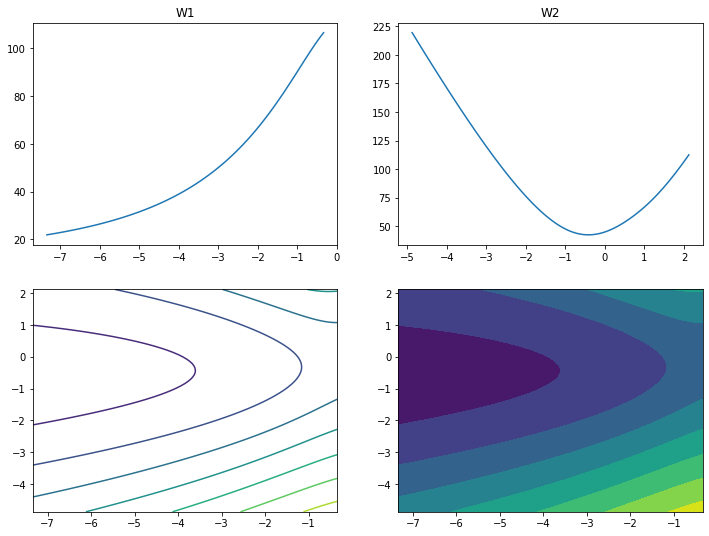

In [16]:
plt.figure(figsize=(12, 9))
plt.subplot(2, 2, 1)
plt.plot(w1_space, loss_1)
plt.title('W1')
plt.subplot(2, 2, 2)
plt.plot(w2_space, loss_2)
plt.title('W2')
plt.subplot(2, 2, 3) # 绘制一个等高线子图
w1_gird, w2_grid = np.meshgrid(w1_space, w2_space)  # 网格线 参数1：行 参数二：列 最后生成的数据应该以最大的长度为主 比如行为3， 列为4，那么就是4行3列\
loss_grid = loss_function(X, y, w1_gird, w2_grid, 0)
plt.contour(w1_gird, w2_grid, loss_grid)  # 等高线

# 等高面
plt.subplot(2, 2, 4)
plt.contourf(w1_gird, w2_grid, loss_grid)

#### 3D图形 

e:\envs\jupy_env\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


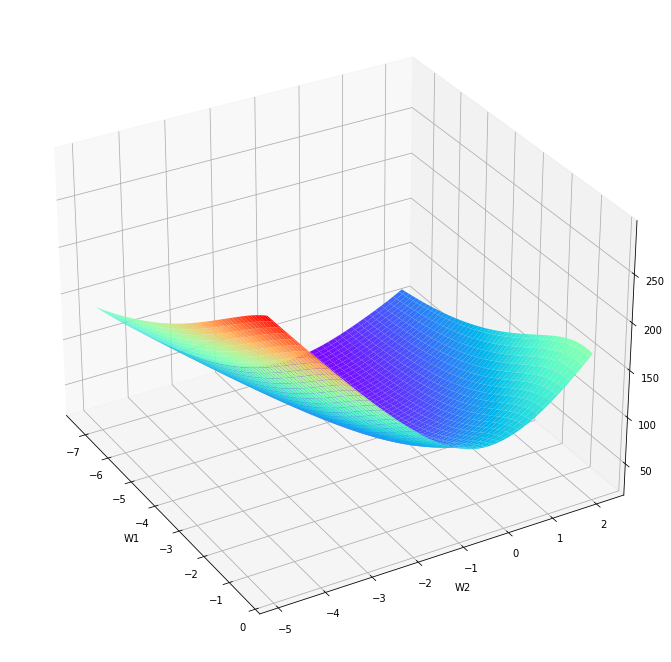

In [17]:
fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)
ax.plot_surface(w1_gird, w2_grid, loss_grid, cmap='rainbow') # rainbow 彩虹色
plt.xlabel('W1')
plt.ylabel('W2')
ax.view_init(30, -30)

### Sigmoid实现鸢尾花数据分类

In [18]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#### 加载数据，剔除特征3

In [19]:
X, y = datasets.load_iris(return_X_y=True) # X为数据，y为特征
conda = y!= 2  # 二分类的问题，鸢尾花数据默认有3种特征，剔除掉第三个特征
X = X[conda]
y = y[conda]

In [20]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

#### 划分训练集和测试集

划分80%的数据作为训练集，将20%的数据作为测试集

In [202]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
display(X_train.shape, X_test.shape)
display(y_train.shape, y_test.shape)

(80, 4)

(20, 4)

(80,)

(20,)

#### 构建模型,预测,测试

In [207]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [208]:
# 预测结果
y_pred = model.predict(X_test)
print('预测的类别是：', y_pred)
print('真实的类别是：', y_test)

预测的类别是： [1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1]
真实的类别是： [1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1]


In [222]:
y_predict = model.predict_proba(X_test)  # 概率 大于0.5的为1类，小于0.5的为0类
y_predict[:5]

array([[0.01203502, 0.98796498],
       [0.9942285 , 0.0057715 ],
       [0.96497947, 0.03502053],
       [0.02651584, 0.97348416],
       [0.97300821, 0.02699179]])

#### 手动实现Sigmoid函数

将结果和模型的结果进行对比，是否为100%的正确率

In [213]:
# 系数
w = model.coef_

In [212]:
# 截距
b = model.intercept_

In [220]:
# 定义一个sigmoid函数
def sigmoid(X):
    return 1 / (1 + np.exp(-X))

z = X_test.dot(w.reshape(-1,1)) + b
p1 = sigmoid(z)  # 求出p1的概率
p0 = 1 - p1

# 进行列的合并
p = np.column_stack([p0,p1])
p[:5]

array([[0.01203502, 0.98796498],
       [0.9942285 , 0.0057715 ],
       [0.96497947, 0.03502053],
       [0.02651584, 0.97348416],
       [0.97300821, 0.02699179]])

### Sigmoid实现葡萄酒数据分类

In [251]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 加载葡萄酒数据
X, y = datasets.load_wine(return_X_y=True)
# 剔除类别为0的数据
X = X[y!=0]
y = y[y!=0]
y

# 划分训练集和测试集  20%作为测试数据
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 构建模型
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 进行预测
np.set_printoptions(suppress=True)
y_pred = model.predict(X_test)
print('预测的类别是：', y_pred)
print('真实的类别是：', y_test)
proba = model.predict_proba(X_test)  # 对应的概率
print('各个类别的概率为：\n', proba[:5])

预测的类别是： [2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 1 1 1 1 1 2 2 2 1]
真实的类别是： [2 2 2 1 2 2 2 2 2 1 2 2 1 2 2 1 1 1 1 1 2 2 2 1]
各个类别的概率为：
 [[0.00434717 0.99565283]
 [0.0004128  0.9995872 ]
 [0.00010756 0.99989244]
 [0.99949559 0.00050441]
 [0.02570995 0.97429005]]


### 手动实现Sigmoid函数分类葡萄酒数据

In [253]:
w = model.coef_
b = model.intercept_

# 构建多元线性方程
y = X_test.dot(w.reshape(-1)) + b 

# 定义一个sigmoid函数
def sigmoid(X):
    return 1 / (1 + np.exp(-X))

# 计算概率
p1 = sigmoid(y)
p0 = 1 - p1
z = np.column_stack([p0,p1])
z[:5]

array([[0.00434717, 0.99565283],
       [0.0004128 , 0.9995872 ],
       [0.00010756, 0.99989244],
       [0.99949559, 0.00050441],
       [0.02570995, 0.97429005]])